In [2]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
import cv2
import matplotlib.pyplot as plt

In [4]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [5]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [6]:
label_class = []
label_name = 'label.txt'
with open(label_name, 'rt') as lb:
    label_class = lb.read().rstrip('\n').split('\n')

In [7]:
print(len(label_class))
print(label_class)

80
['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [13]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5) # 255/2 = 127.5
model.setInputMean((127.5, 127.5, 127.5)) # mobilenet => [1,-1]
model.setInputSwapRB(True)

< cv2.dnn.Model 000002186E90D230>

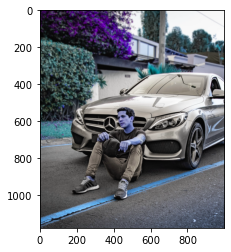

In [22]:
# read an image
image = cv2.imread('person-car.jpeg')
plt.imshow(image) ##bgr

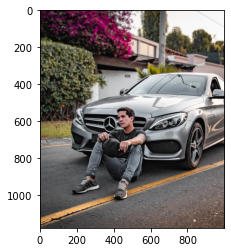

In [23]:
# orginal image 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 

In [33]:
classLabel, confidence, bbox = model.detect(image,confThreshold=0.5)

In [34]:
print(classLabel)

[1 3]


In [36]:
font_scale =3 
font = cv2.FONT_HERSHEY_PLAIN
for classLbl, conf, boxes in zip(classLabel.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(image,boxes,(255, 0, 0), 2)
    cv2.putText(image, label_class[classLbl-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
    #cv2.putText(image, label_class[classLbl-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color(0, 255, 0), thickness=3 )

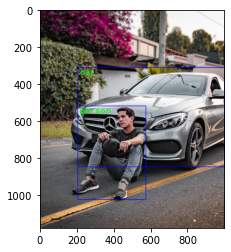

In [37]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 

## Object Detect in Video

In [39]:
capture = cv2.VideoCapture("walk-in-tokyo.mp4")
# check if the video is opened correctly
if not capture.isOpened():
    capture = cv2.VideoCapture(0)
if not capture.isOpened():
    raise IOError("Cannot open video")

font_scale =3 
font = cv2.FONT_HERSHEY_PLAIN
while True:
    ret, frame = capture.read()
    classLabel, confidence, bbox = model.detect(frame,confThreshold=0.55)
    print(classLabel)
    if(len(classLabel) != 0):
        for classLbl, conf, boxes in zip(classLabel.flatten(), confidence.flatten(), bbox):
            if(classLbl <= 80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, label_class[classLbl-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
    cv2.imshow('Object Detection', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
capture.release()
cv2.destroyAllWindows()

[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[ 1  1  1  1  1  1  1 10  1  1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1

[1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[ 1  1  1  1  1  1 10  1  1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[ 1  1  1  1  1  1  1 10]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1]
[ 1  1  1 10  1  1  1  1]
[ 1  1  1  1  1 10]
[ 1  1 10  1  1  1  1  1]
[ 1  1  1 10  1  1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[ 1  1 10  1  1  1  1  1  1]
[ 1  1 10  1  1  1  1  1  1  1  1  1]
[ 1  1 10  1  1  1  1  1  1  1  1  1]
[ 1  1  1  1  1  1 10  1  1  1]
[ 1  1  1 10  1  1  1  1  1]
[ 1  1  1  1 10  1  1  1  1  1  1  1]
[ 1  1 10  1  1  1  1  1  1  1  1]
[ 1  1  1  1 10  1  1  1]
[ 1  1 10  1  1  1]
[ 1  1 10  1  1  1  1]
[ 1  1  1 10  1 10  1  1  1]
[ 1  1 10  1  1  1 10  1  1  1  1]
[ 1  1  1  1 10  1  1]
[ 1  1  1 85  1  1  1  1  1  1]
[ 1  1  1  1  1  1  1  1 85  1

[ 1  1  1  1  1  1  1  1  1  1 27  1]
[ 1  1  1  1  1  1  1  1  1  1 27  1]
[1 1 1 1 1 1 1 1 1 1 1]
[ 1  1  1  1  1  1  1  1  1  1  1 10  1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1]
[ 1  1  1  1  1  1  1  1 10  1]
[1 1 1 1 1 1 1 1 1]
[ 1  1  1  1  1  1 10]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[ 1  1  1  1  1  1  1  1  1 31  1]
[ 1  1  1  1  1  1  1  1 31  1  1]
[1 1 1 1 1 1 1 1 1 1]
[ 1  1  1  1  1  1  1  1  1  1 31  1]
[ 1  1  1  1  1  1 31  1  1  1 10]
[ 1  1  1  1  1 31  1  1  1  1  1]
[ 1  1  1  1  1  1  1  1  1 31  1]
[ 1  1  1  1  1  1  1  1  1  1 31 31  1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[ 1  1  1  1 10  1  1  1  1]
[1 1 

[2 1 3 2]
[2 3 2 1]
[2 1 1 3 2]
[2 1]
[2 1 2 3 1]
[1 2 4 1 1 1]
[2 1 1 4 1]
[1 2 2 4]
[1 1 1 2 4]
[1 1 1 2]
[1 1 1 2 1 1]
[1 1 1 2 1]
[1 1 1 2 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 3 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 3]
[1 1 1 1 1 1 1 3 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[ 1  1  1  1  1  1  1 10  1  1  1  1]
[1 1 1 1 1 1 1 1 1 1]
[ 1  1  1  1  1  1 10]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 6]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 

[ 3  1  1 64  1  1]
[ 3  1  1 64  1  1]
[ 3  1  1 64  1  1]
[ 3 64  1  1  1]
[64  1  3  1  1 85  1]
[64  3  1  1  1  1]
[ 3 64  1  1  1]
[ 1 64  3  1  1  1]
[64  3  1  1  1  1  1]
[ 3 64  1  1  1  1  1]
[ 3 64  1  1  1  1]
[64  3  1  1  1]
[64  1  3  1  1  1  1]
[ 3  1 64  1  1  1  1]
[ 3 64  1  1  1  1  1  1]
[ 1  3 64  1  1  1  1  1]
[ 3  1  1  1  1 64]
[ 3 64  1  1  1  1  1]
[ 3  1 64  1  1  1  1]
[ 3  1  1  1  1 64  1]
[64  1  3  1  1  1  1]
[64  1  1  1  1  3  1  1]
[ 1  1 64  1  1  3  1]
[ 3 64  1  1  1  1  1]
[ 1  3  1  1 64  1  1]
[ 1  1  1  1 64  3  1]
[ 1  1  1 64  3  1  1]
[ 1  3  1  1  1 64  1]
[1 1 1 1 1]
[ 1  1  1  1  3 64]
[ 1  1 64  1  1  1  3]
[ 1  1  1 64  1  1]
[ 1  1  1  1  1 64]
[ 1  1  1  1  1 64]
[1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1 3]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 3 1]
[1 1 1 3 1 1]
[1 1 1 1 3 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 3]
[1 1 1 1 1]
[1 1 1 1 1 3]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 

[1 1 1 3 1]
[ 1  1  3  1 31]
[ 1  1 31  1]
[ 1  1  3  1 31  1]
[1 1 3 1 1]
[1 1 1 1 3]
[1 1 1 1 1 1]
[1 1 1 1 3 3 1 1]
[1 1 3 1 1 1 3]
[1 1 3 1 1]
[1 3 1 3 1 2]
[1 3 1 1 1 1]
[1 3 1 1 2 1 1 1 1]
[1 3 1 1 1 1]
[ 1  3  1  1  1  1 31]
[ 3  1  1  1  1 31 31]
[ 1  3  1  1 31]
[1 3 1 1 1 1 2]
[1 2 3 1 1]
[1 2 3 1 1]
[ 1  2  1  3  1  1 31]
[ 1  2  1  1  3 31  1]
[1 3 2 1 1 1 1]
[1 1 2 1 3 1 1 1 1]
[1 1 1 1 2 3 1 1 1]
[1 1 2 3 1 1 1 1 1]
[2 3 1 1 1 1 1 1 8 1]
[2 1 3 1 1 1]
[ 1  3 31  1  1  1  1  1]
[31  1  3  1  1  1  1  1  1]
[ 3  1 31  1  1  1  1  1]
[ 3  1 31  1  1  1 31  1  1]
[ 3  3  1  1  1  1  1 31 31]
[ 3  1  1  1  1  3 31  1]
[3 1 1 1 1 3]
[1 3 3 1 1 1]
[1 1 3 1]
[1 1 1 3 1 3 1]
[3 1 1 1 1 1]
[3 1 1 1 1 1 1]
[1 1 1 1 1 3 3 1]
[1 1 1 1 1 1]
[ 1  1 31  1  1]
[ 1  1  1  1  1 31]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 3]
[ 1  1  1  1  1  1  3  1  1 31]
[1 1 3 1 1 1 1 3]
[1 1 1 1 1 1 1 1 3]
[1 1 1 3 1]
[ 1  3  1  1 31  1]
[1 3 1 1 1 1 1]
[1 3 1

[1 1 1 1 6 1 6 1]
[1 1 1 1 1]
[1 1 1 1 3 1 1 8 1]
[1 1 1 1 1 3 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 8 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 8 1 1]
[1 1 1 8 1 1 1 1]
[8 1 1 1 1 1 1 1]
[8 1 1 1 1 1 1 1 1]
[1 8 1 1 1 1 1 1 1]
[1 8 1 1 1 1 1 1]
[8 1 1 1 1 1 1 1 1]
[8 1 1 1 1 1 1 1]
[8 1 1 1 1 1 1 1 1]
[8 1 1 1 1 1 1 1 1]
[8 1 1 1 1 7 1 1 1]
[1 1 8 1 1 1 1]
[8 1 1 1 1 1]
[8 1 1 1 1 1 1 1]
[1 1 1 1 8 1 1]
[1 1 1 1 1 8 1 1 1]
[1 1 1 1 1 1 8 1]
[1 1 1 1 1 8 1 1]
[1 1 1 1 1 1 8 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 8 1]
[1 1 1 1 1 8 1 1]
[1 1 1 1 8 1 1 1 1]
[1 1 1 1 8 1 1 1]
[1 1 1 8 1 1 1 1 1]
[1 1 8 1 1 1 1]
[8 1 1 1 1 1 1 1]
[1 1 1 1 1 1 8 1]
[1 8 1 1 1 1 1 1]
[1 8 1 1 1 1 1]
[1 1 8 1 1 1]
[1 1 1 8 1]
[8 1 1 1 1 1 1]
[1 1 1 8 1 1 1 1]
[8 1 1 1 1 1]
[ 8  1  1  1  1 15]
[8 1 1 1 1 1 1]
[8 1 1 1 1 1 1 1]
[8 1 1 1 1 1 1]
[8 1 1 1 1 1]
[8 1 1 1 1 1 1 1]
[8 1 1 1 1 1 1]
[8 1 1 1 1

[1 1 1 1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1 1]
[1 1]
[3 1 1 3]
[1 1 1 3]
[1 1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1 8 1]
[1 1 1 8 1]
[1 1 1 1 8]
[1 1 1 8]
[1 1 1 8]
[1 1 8 1]
[1 1 8 1]
[1 1 8 1 1]
[1 8 1 1 1]
[1 8 1 1 1]
[1 8 1 1 1]
[1 8 1 1 1]
[1 8 1 1 1]
[1 8 1 1 1 1]
[1 8 1 1 1 1]
[1 8 1 1 1]
[1 8 1 1 1]
[1 8 1 1 1]
[1 8 1 1 1]
[1 8 1 1 1]
[8 1 1 1 1 1]
[8 1 1 1 1 1]
[8 1 1 1 1 1]
[8 1 1 1 1 1 1]
[8 1 1 1]
[8 1 1 1]
[8 1 1 1 1]
[8 1 1 1 1 1]
[8 1 1 1 1]
[1 8 1 1]
[1 8 1 1]
[1 8 1 1]
[1 1 8 1 1]
[1 1 8 1 1]
[1 8 1 1 1]
[1 8 1 1 1 1]
[ 1  8  1  1  1 31]
[1 1 8 1 1 1]
[1 1 1 8 1 1]
[1 1 1 8 1]
[1 1 1 8]
[1 1 1 8]
[1 1 1 8 6]
[1 1 1 1 3 1]
[ 1  1  1  1 31  3  1]
[1 1 1 1 1 1]
[1 1 1 1 1 2]
[1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 8 1]
[1 1 8 1]
[1 1 1 1]
[1 8 1 1 1]
[1 8 6 1 1 1 1]
[1 8 1 1 1 6 1 1]
[1 8 1 1 1 1 1 2]
[1 8 1 1 1 1]
[1 8 1 1 1 1 1]
[1 8 1 1 1 1 1 1]
[

[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1 3]
[1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 3 1 1]
[1 1 1 1 1 3 1]
[1 1 1 1 3 1]
[1 1 3 1 1 1 1]
[1 1 1 1 3 1]
[1 1 1 1 1 1 3]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 3 1 1]
[1 1 1 1 1 1 3 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1 3]
[1 1 1 1 1 3 1]
[1 1 1 1 1 7 1]
[1 1 1 1 1 7]
[1 1 1 1 1 1 7]
[1 1 1 1 7 1 1]
[1 1 1 1 7 1 1]
[1 1 1 1 7 1 1]
[1 1 1 1 7 1 1 1]
[1 1 1 1 7 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 7 1]
[1 1 1 1 1 7 1 1]
[1 1 1 1 1 7 1 1]
[1 1 1 1 7 1 1]
[1 1 1 1 7 1]
[1 1 1 1 7]
[1 1 1 1 7]
[1 1 1 7 1]
[1 1 1 1 7 6 1]
[1 1 1 1]
[1 1 1 7 1]
[1 1 1 6 1]
[1 1 1 6 1]
[1 1 1 6 1]
[1 1 1 6 1 1]
[ 1  1  1  6  1  1 85  1]
[1 1 1 1 1 1]
[1 1 1 1 1 6]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1]
[1

KeyboardInterrupt: 

In [1]:
## Object Detect in WebCam

In [40]:
capture = cv2.VideoCapture(1)
# check if the video is opened correctly
if not capture.isOpened():
    capture = cv2.VideoCapture(0)
if not capture.isOpened():
    raise IOError("Cannot open webcam")

font_scale =3 
font = cv2.FONT_HERSHEY_PLAIN
while True:
    ret, frame = capture.read()
    classLabel, confidence, bbox = model.detect(frame,confThreshold=0.55)
    print(classLabel)
    if(len(classLabel) != 0):
        for classLbl, conf, boxes in zip(classLabel.flatten(), confidence.flatten(), bbox):
            if(classLbl <= 80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, label_class[classLbl-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
    cv2.imshow('Object Detection', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
capture.release()
cv2.destroyAllWindows()

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[18  1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[18]
[1]
[1]
[1]
[ 1 18]
[1]
[ 1 18]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 18]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 18]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[ 1 18]
[1]
[1]
[1 1]
[1]
[18]
[1]
[1]
[18]
[ 1 18]
[1]
[1]
[1]
[ 1 18]
[1]
[1 1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 18]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 18]
[1]
[1]
[18]
[18]
[1]
[ 1 17]
[17  1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 73 18]
[ 1 73]
[1]
[ 1 73]
[1]
[ 1 73]
[1]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 18]
[1]
[1]
[ 1 18]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[ 1 18]
[18 18]
[ 1 18]
[1]
[1]
[ 1 77  1]
[

KeyboardInterrupt: 